In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Useful packages for building deep neural networks. 
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,Flatten,Dense,Dropout, Reshape,MaxPooling2D,Conv2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

#Additional library which we will use for preprocessing our image data before training our model and to provide some specific evaluation metrics.
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [2]:
#HAVE A LOOK AT THE ORIGINAL DATA

# data = pd.read_csv('/content/drive/MyDrive/Studies/Master of AI/Advanced_Analytics/Assignment_1/data_original/train_month_3_with_target.csv')
# data_cleaned = pd.read_csv("/content/drive/MyDrive/Studies/Master of AI/Advanced_Analytics/Assignment_1/cleaned_data_Gonzalo/cleanedDataClassOccupation.csv")
data = pd.read_csv('data/train_month_3_with_target.csv') # USE !pwd command below to replace the path of `read_csv` if short ones dont work for you
data_cleaned = pd.read_csv("out/cleanedDataClassOccupation.csv") # USE !pwd command below to replace the path of `read_csv` if short ones dont work for you
print('number of observations:{}'.format(len(data_cleaned)))
print('number of features:{}'.format(len(data_cleaned.iloc[0,:])))


number of observations:63697
number of features:39


In [3]:
!pwd

/Users/apple/Documents/Advance Analytics/advance-analytics-belgian-bank


In [4]:
print(data_cleaned.dtypes)
data.iloc[:,0:20].describe()

client_id                             object
homebanking_active                     int64
has_homebanking                        int64
has_insurance_21                       int64
has_insurance_23                       int64
has_life_insurance_fixed_cap           int64
has_life_insurance_decreasing_cap      int64
has_fire_car_other_insurance           int64
has_personal_loan                      int64
has_mortgage_loan                      int64
has_pension_saving                     int64
has_savings_account                    int64
has_savings_account_starter            int64
has_current_account_starter            int64
bal_insurance_21                     float64
bal_insurance_23                     float64
cap_life_insurance_fixed_cap         float64
cap_life_insurance_decreasing_cap    float64
prem_fire_car_other_insurance        float64
bal_personal_loan                    float64
bal_mortgage_loan                    float64
bal_current_account                  float64
bal_pensio

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,has_pension_saving,has_savings_account,has_savings_account_starter,has_current_account_starter,bal_insurance_21,bal_insurance_23,cap_life_insurance_fixed_cap,cap_life_insurance_decreasing_cap,prem_fire_car_other_insurance
count,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000
mean,0.215191,0.280939,0.095028,0.009953,0.002747,0.111779,0.318053,0.041619,0.098089,0.500809,0.021963,0.970956,0.005919,0.017960,457.960187,47.432375,78.260044,11565.570592,183.667049
std,0.410958,0.449462,0.293256,0.099270,0.052344,0.315097,0.465724,0.199718,0.297438,0.500003,0.146565,0.167931,0.076705,0.132807,1641.970743,536.978630,2538.927213,40229.761726,368.599652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,9890.000000,220000.000000,780000.000000,3000.000000


In [5]:
data.iloc[:,20:40].describe()

,bal_personal_loan,bal_mortgage_loan,bal_current_account,bal_pension_saving,bal_savings_account,bal_savings_account_starter,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_gender,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,target
count,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,61695.000000,63697.000000,16572.000000,63697.000000
mean,402.469347,8868.815486,1323.660612,233.421982,17872.484889,57.641176,30.320894,1.230199,1.042608,1.486444,5577.261959,8.773531,0.087021,2.463734,0.030033
std,2662.560352,35525.256697,2685.727023,2140.173418,11750.868466,892.959859,407.877892,0.501498,0.224991,0.499820,3020.064554,1.131453,0.281869,1.520309,0.170679
min,0.000000,0.000000,-1000.000000,0.000000,0.000000,0.000000,-330.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8450.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2650.000000,9.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,15170.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4877.000000,9.000000,0.000000,2.000000,0.000000
75%,0.000000,0.000000,1520.000000,0.000000,25480.000000,0.000000,0.000000,1.000000,1.000000,2.000000,8750.000000,9.000000,0.000000,3.000000,0.000000
max,71690.000000,490000.000000,20000.000000,41170.000000,50000.000000,24050.000000,19790.000000,7.000000,6.000000,2.000000,9992.000000,9.000000,1.000000,6.000000,1.000000


In [6]:
data.iloc[:,40:].describe()

ValueError: Cannot describe a DataFrame without columns

count    63697.000000
mean         1.042608
std          0.224991
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: visits_distinct_so_areas, dtype: float64

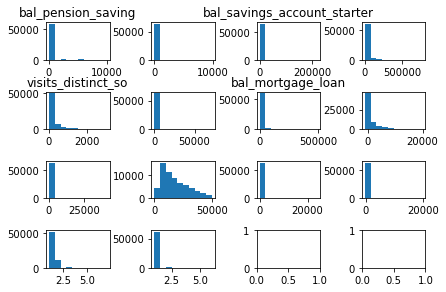

In [7]:
#PLOT DISTRIBUTION OF BALANCES VARIABLES
#Balance data is heavily influenced by outliers
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16)) = plt.subplots(nrows = 4, ncols = 4)
fig.tight_layout()


ax1.hist(data.iloc[:,15], bins = 10), ax1.set_title(data.columns[15])
ax2.hist(data.iloc[:,16], bins = 10), #ax2.set_title(data.columns[16])
ax3.hist(data.iloc[:,17], bins = 10), ax3.set_title(data.columns[17])
ax4.hist(data.iloc[:,18], bins = 10), #ax4.set_title(data.columns[18])
ax5.hist(data.iloc[:,19], bins = 10), ax5.set_title(data.columns[19])
ax6.hist(data.iloc[:,20], bins = 10), #ax6.set_title(data.columns[20])
ax7.hist(data.iloc[:,21], bins = 10), ax7.set_title(data.columns[21])
ax8.hist(data.iloc[:,22], bins = 10), #ax8.set_title(data.columns[22])
ax9.hist(data.iloc[:,23], bins = 10), ax1.set_title(data.columns[23])
ax10.hist(data.iloc[:,24], bins = 10), #ax2.set_title(data.columns[24])
ax11.hist(data.iloc[:,25], bins = 10), ax3.set_title(data.columns[25])
ax12.hist(data.iloc[:,26], bins = 10), #ax4.set_title(data.columns[26])
ax13.hist(data.iloc[:,27], bins = 10), ax5.set_title(data.columns[27])
ax14.hist(data.iloc[:,28], bins = 10), #ax6.set_title(data.columns[28])
#Dates have to be transformed before plotting
# ax15.hist(data.iloc[:,29], bins = 10), ax7.set_title(data.columns[29])
# ax16.hist(data.iloc[:,30], bins = 10), #ax8.set_title(data.columns[30])


data.columns.get_loc("visits_distinct_so_areas")
data["visits_distinct_so_areas"].describe()

In [9]:
data_cleaned = pd.read_csv("/content/drive/MyDrive/Studies/Master of AI/Advanced_Analytics/Assignment_1/cleaned_data_Gonzalo/cleanedDataClassOccupation.csv")
#Get overview of all data columns
print('number of observations:{}'.format(len(data_cleaned)))
print('number of features:{}'.format(len(data_cleaned.iloc[0,:])))
# print(data_cleaned.dtypes)
# data_cleaned.iloc[:,0:20].describe()

number of observations:63697
number of features:48


In [8]:
data_cleaned.iloc[:,20:40].describe()

,bal_mortgage_loan,bal_current_account,bal_pension_saving,bal_savings_account,bal_savings_account_starter,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_since_all,customer_since_bank,customer_gender,customer_birth_date,brussels_postal_code,flanders_postal_code,wallonia_postal_code,other_postal_code,customer_occupation_code_0,customer_self_employed,target
count,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000
mean,0.018100,0.110651,0.005670,0.357450,0.002397,0.017909,0.038367,0.008522,0.299760,0.324483,0.486444,0.285726,0.042906,0.775044,0.160698,0.021351,0.975628,0.087021,0.030033
std,0.072501,0.127892,0.051984,0.235017,0.037129,0.020272,0.083583,0.044998,0.178474,0.217303,0.499820,0.146570,0.202647,0.417556,0.367255,0.144553,0.123803,0.281869,0.170679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.047619,0.000000,0.169000,0.000000,0.016402,0.000000,0.000000,0.155556,0.131363,0.000000,0.174284,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.047619,0.000000,0.303400,0.000000,0.016402,0.000000,0.000000,0.299346,0.313629,0.000000,0.293723,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.120000,0.000000,0.509600,0.000000,0.016402,0.000000,0.000000,0.410458,0.472906,1.000000,0.405850,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data_cleaned.iloc[:,40:].describe()

ValueError: Cannot describe a DataFrame without columns

In [10]:
#Preprocess the dataset for model training
try:
  data_cleaned.drop('client_id',inplace=True,axis=1) #split of the customer ID row
except KeyError:
  print('client_id has already been removed')

print('number of features:{}\n'.format(len(data_cleaned.iloc[0,:])))
data_cleaned = data_cleaned.sample(frac=1).reset_index(drop=True) #don't create a new column with original indices
train_df,test_df = train_test_split(data_cleaned, test_size=0.15,shuffle = False)
print('training set shape:{}'.format(train_df.shape))
print('test set shape:{}\n'.format(test_df.shape))

X_train, y_train = train_df.loc[:, train_df.columns != 'target'],train_df.loc[:,'target']
print('training features shape:{}'.format(X_train.shape))
print('traininh target shape:{}\n'.format(y_train.shape))

X_test, y_test = test_df.loc[:, test_df.columns != 'target'],test_df.loc[:,'target']
print('test features shape:{}'.format(X_test.shape))
print('test target shape:{}\n'.format(y_test.shape))


number of features:38

training set shape:(54142, 38)
test set shape:(9555, 38)

training features shape:(54142, 37)
traininh target shape:(54142,)

test features shape:(9555, 37)
test target shape:(9555,)



In [11]:

#Since we have a class imbalance let's create a dictionary with class weights to balance this. This step helps the model give equal attention to less frequent training examples, be making mistakes
#on these examples more costly.
classes = np.unique(y_train,return_counts=True)[0]
class_weights_arr = sklearn.utils.class_weight.compute_class_weight(class_weight = 'balanced', classes = classes, y = y_train)
print(classes)
print(class_weights_arr)

class_weights_dict = {} #input to model.fit requires dictionary
for i in classes:
    class_weights_dict[i] = class_weights_arr[i]
print(class_weights_dict)

[0 1]
[ 0.51562827 16.49664839]
{0: 0.5156282737471667, 1: 16.496648385131017}


In [12]:
#ASSESS MODEL PERFORMANCE WITH CURRENT CLEANED DATA
#Set parameters
lr = 0.001
momentum = 0.9
batch_size = 64

# from keras import Sequential
model = Sequential()
model.add(layers.Dense(256, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss='binary_crossentropy', #integer encoded target labels, so sparse 
              optimizer='adam',
              metrics=['accuracy'])

2022-04-14 13:57:04.547998: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
%%time
model.fit(X_train,
          y_train,
          validation_split=0.2,
          batch_size = batch_size, 
          class_weight = class_weights_dict,
          epochs=5,
          )

Epoch 1/5
677/677 [==============================] - 2s 3ms/step - loss: 0.6376 - accuracy: 0.6510 - val_loss: 0.5487 - val_accuracy: 0.6980
Epoch 2/5
677/677 [==============================] - 1s 2ms/step - loss: 0.6249 - accuracy: 0.6512 - val_loss: 0.6953 - val_accuracy: 0.6340
Epoch 3/5
677/677 [==============================] - 2s 3ms/step - loss: 0.6193 - accuracy: 0.6529 - val_loss: 0.6314 - val_accuracy: 0.6226
Epoch 4/5
677/677 [==============================] - 2s 3ms/step - loss: 0.6161 - accuracy: 0.6526 - val_loss: 0.6540 - val_accuracy: 0.6229
Epoch 5/5
677/677 [==============================] - 1s 2ms/step - loss: 0.6139 - accuracy: 0.6816 - val_loss: 0.5862 - val_accuracy: 0.6725
CPU times: user 13.8 s, sys: 2.84 s, total: 16.6 s
Wall time: 8.99 s


In [30]:
def predict_with_postprocessing(data):
  predictions_proba = model.predict(data)
  predictions = []
  for x in predictions_proba:
    if x>0.5:
      predictions.append(1)
    else:
      predictions.append(0)
  return predictions

prediction_labels= predict_with_postprocessing(X_test)

#AUC Curve is desirable here to evaluate the effect of different cut-off values for the predictions
print('Overall classification report:') 
print(classification_report(y_test,prediction_labels))

print('\nConfusion matrix:')
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, prediction_labels, normalize = 'true') 
plt.show() 



Overall classification report:
              precision    recall  f1-score   support

           0       0.98      0.68      0.81      9283
           1       0.05      0.60      0.10       272

    accuracy                           0.68      9555
   macro avg       0.52      0.64      0.45      9555
weighted avg       0.96      0.68      0.79      9555


Confusion matrix:


AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

In [43]:
# TEST THE MODEL ON TEST DATA
prediction_data = pd.read_csv("out/cleanedDataNoClassOccupation.csv") # USE !pwd command to replace the path of `read_csv` if short ones dont work for you
prediction_data_wo_client_id = prediction_data.loc[:, prediction_data.columns != 'client_id']
prediction_data_probs = model.predict(prediction_data_wo_client_id)


In [44]:
# GENERATE PREDICTIONS.CSV
prediction_data["target"] = prediction_data_probs
prediction_data[["client_id","target"]].to_csv('out/predictions.csv',
                 sep=',', encoding='utf-8', index=False, header=False)

In [ ]:
# One-hot encode categorical variables
# Integer encode ordinal variables
# Remove client_id as a feature
# 